In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
def normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    Normalized = [(x - mean) / std for x in data]
    
    return Normalized

# Menu
## I. Binary
* ### 1. Create Sample Data
* ### 2. Transform Data
* ### 3. Training Data
* ### 4. Predict
* ### 5. Predict with Sklern Lib

## II. Category

____

## I. Binary

## 1. Create Sample Data

* Cho tập [(X1, X2), Y), trong đó : 
* X1, X2 : Thời gian học và thời gian ngủ
* Y : Xếp loại học lực

Text(0,0.5,'Y : Time to sleep')

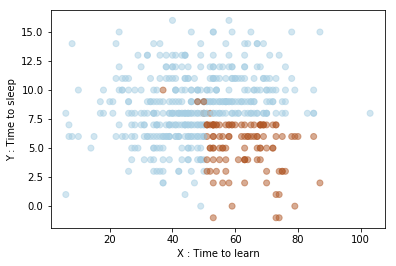

In [3]:
# Cho tập (X, Y)
# Trong đó : 

N_sample = 500
# , Y là kết quả {0,1} <=> {đậu, rớt} của sinh viên
X1 = np.random.normal(loc=50, scale=15, size = N_sample).round()
X2 = np.random.normal(loc=8, scale=3, size = N_sample).round()

Y = [int(X1[i]>np.mean(X1)) and int(X2[i]<np.mean(X2)) for i in range(N_sample)]

# Tao Outlier khoang 10%
outlier = np.random.randint(0, N_sample, 5)
for i in outlier:
    Y[i] = 1 - Y[i]


plt.scatter(X1, X2, c=Y, cmap=plt.cm.Paired, alpha=0.5)
plt.xlabel('X : Time to learn')
plt.ylabel('Y : Time to sleep')

## 2. Transform Data

### 2.1 Normilazed Data and Concate X1, X2, one into X

In [4]:
#X1_norm = preprocessing.normalize(np.matrix(X1), norm='l2', copy=True)
#X2_norm = preprocessing.normalize(np.matrix(X2), norm='l2', copy=True)

X1_norm = np.matrix(normalization(X1))
X2_norm = np.matrix(normalization(X2))

In [5]:
ones = np.matrix(np.ones(X1.shape[0]))
X = np.concatenate((X1_norm, X2_norm, ones), axis = 0).reshape(3, N_sample).T
Y = np.matrix(Y).reshape(N_sample, 1)

In [6]:
X[:10]

matrix([[ 0.12220132, -0.96085318,  1.        ],
        [-0.38380827,  0.02228445,  1.        ],
        [ 0.31195491,  0.349997  ,  1.        ],
        [-1.01632026,  1.98855973,  1.        ],
        [-0.44705947,  0.67770954,  1.        ],
        [ 0.18545251,  1.33313464,  1.        ],
        [-0.63681307,  1.00542209,  1.        ],
        [-0.70006426,  0.02228445,  1.        ],
        [-0.32055707,  1.00542209,  1.        ],
        [ 0.8179645 , -1.94399082,  1.        ]])

In [7]:
Y[:10]

matrix([[1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1]])

(array([ 10.,  20.,  59.,  91., 130.,  89.,  72.,  22.,   6.,   1.]),
 array([-2.78735382, -2.17381719, -1.56028056, -0.94674394, -0.33320731,
         0.28032931,  0.89386594,  1.50740256,  2.12093919,  2.73447581,
         3.34801244]),
 <a list of 10 Patch objects>)

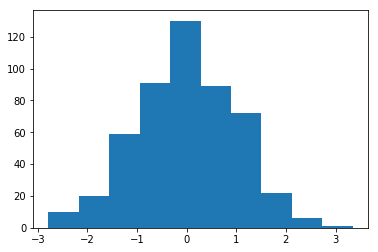

In [8]:
plt.hist(X1_norm.tolist())

### 2.2 Split Train and Set Sample

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
len(X_train)

335

### TEST DATA

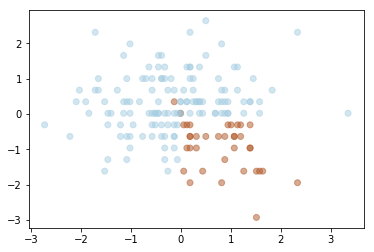

In [11]:
plt.scatter(X_test[:, 0].tolist(), X_test[:, 1].tolist(), c=y_test.tolist(), cmap=plt.cm.Paired, alpha=0.5)

## 3. Training

In [12]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    return (-1/m) * np.sum(y.T * np.log(sigmoid(x * theta.T)) + (1-y.T) * np.log(1 - sigmoid(x * theta.T)))

def trainning(x, y, epoch, alpha):
    _theta = [1, 1, 1]
    _train = 0
    _cost = []
    m = x.shape[0]
    while(_train<epoch):
        for i in range(len(_theta)):
            _theta[i] -= (alpha / m) * np.sum(((sigmoid(x * np.matrix(_theta).T) - y)).T * x[:,i])
            _cost.append(cost(x, y, np.matrix(_theta)))
        _train += 1

    return {'theta': _theta, 'cost': _cost}

In [13]:
trained_value = trainning(X_train, y_train, 15000, 0.001)

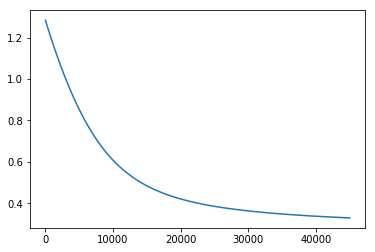

In [14]:
plt.plot(trained_value['cost'])

## 4. Predict from test data sample

Text(0,0.5,'Y : Time to sleep')

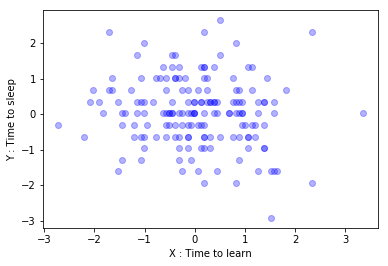

In [15]:
plt.plot(X_test.T[0], X_test.T[1], 'bo', alpha = 0.3)
plt.xlabel('X : Time to learn')
plt.ylabel('Y : Time to sleep')

In [16]:
y_Predict = sigmoid(X_test * np.matrix(trained_value['theta']).T)
predic_1 = [[int(x[0])] for x in [y_Predict >  0.5][0].tolist()]

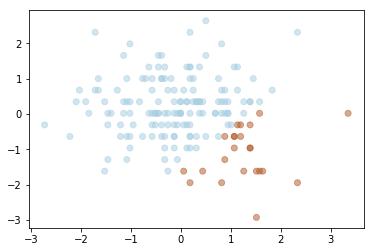

In [17]:
plt.scatter(X_test[:, 0].tolist(), X_test[:, 1].tolist(), c= predic_1 , cmap=plt.cm.Paired, alpha=0.5)

## 5. Predict with Sklearn Lib

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)

C:\Users\lucnm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


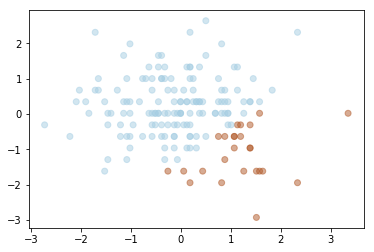

In [19]:
y_predict = [[x] for x in predict]
plt.scatter(X_test[:, 0].tolist(), X_test[:, 1].tolist(), c=y_predict , cmap=plt.cm.Paired, alpha=0.5)

# II. Category

## 1. Create sample data

Text(0,0.5,'Y : Time to sleep')

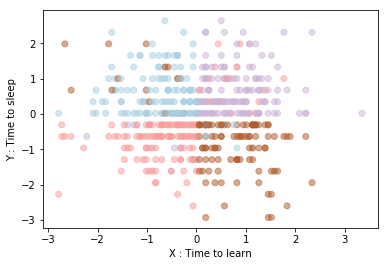

In [20]:
# Cho tập (X, Y)
# Trong đó : 

N_sample = 500
# , Y là kết quả {0,1} <=> {đậu, rớt} của sinh viên
# X1 = np.random.normal(loc=50, scale=15, size = N_sample).round()
# X2 = np.random.normal(loc=8, scale=3, size = N_sample).round()
X1 = X1_norm.tolist()[0]
X2 = X2_norm.tolist()[0]

Y = [int(X1[i]>np.mean(X1))*2 + int(X2[i]<np.mean(X2)) for i in range(N_sample)]

# Tao Outlier khoang 10%
outlier = np.random.randint(0, N_sample, 50)
for i in outlier:
    Y[i] = 3 - Y[i]

plt.scatter(X1, X2, c=Y, cmap=plt.cm.Paired, alpha=0.5)
plt.xlabel('X : Time to learn')
plt.ylabel('Y : Time to sleep')

## 2. Transpore Data for Y


\begin{pmatrix}
0\\ 
1\\
2\\
3\\
\end{pmatrix}

Convert To : 
\begin{pmatrix}
1 & 0 & 0& 0\\
0 & 1 & 0& 0\\
0 & 0 & 1& 0\\
0 & 0 & 0& 1\\
\end{pmatrix}

In [21]:
# Convert 1 array to Matrix
def transform_to_class(y):
    _ytrans = []
    ymax = np.max(y) + 1
    for i in y:
        L = [0] * ymax
        L[i] = 1
        _ytrans.append(L)
    return _ytrans

# Convert a Matrix to Array
def transform_to_value(y):
    _ytrans = []
    for i in reversed(y):
        _ytrans.append([i.index(1)])
    return _ytrans[::-1]

# Function tương đương với function Transform_to_class
from scipy import sparse 
def convert_labels(y, C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [22]:
y_trans = transform_to_class(Y)

## 3. Create Train and Test Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

y_train = transform_to_class(y_train)
y_test = transform_to_class(y_test)

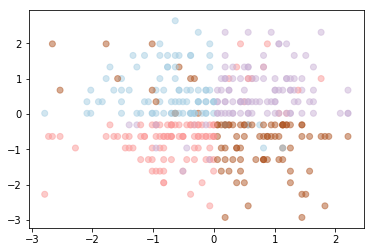

In [24]:
Y_plot = transform_to_value(y_train)
plt.scatter(X_train[:, 0].tolist(), X_train[:, 1].tolist(), c=Y_plot, cmap=plt.cm.Paired, alpha=0.5)

## 4. Training

## Step 1: 
Training với 4 Class của Y khác nhau.

In [25]:
H0_Theta = trainning(X_train, np.matrix(y_train)[:, 0], 10000, 0.001)
H1_Theta = trainning(X_train, np.matrix(y_train)[:, 1], 10000, 0.001)
H2_Theta = trainning(X_train, np.matrix(y_train)[:, 2], 10000, 0.001)
H3_Theta = trainning(X_train, np.matrix(y_train)[:, 3], 10000, 0.001)

## Step 2 : 
Dựa vào 4 Theta từ 4 Class đã tìm được ở Step1, thay vào hàm Sigmoid và tính giá trị H0,H1,H2,H3

Nếu giá trị thuộc hàm nào lớn nhất, X sẽ thuộc hàm đó

In [26]:
H0 = sigmoid(X_test * np.matrix(H0_Theta['theta']).T)
H1 = sigmoid(X_test * np.matrix(H1_Theta['theta']).T)
H2 = sigmoid(X_test * np.matrix(H2_Theta['theta']).T)
H3 = sigmoid(X_test * np.matrix(H3_Theta['theta']).T)

## Step 3: 
Tìm giá trị Max của H0, H1, H2, H3

In [27]:
Predict_resuild = np.concatenate((H0, H1, H2, H3), axis = 1).reshape(X_test.shape[0],4)
Predict_resuild_max = [max(i) for i in Predict_resuild.tolist()]

In [28]:
Predict_resuild_arr = []
for i in range(Predict_resuild.shape[0]):
    Predict_resuild_arr.append((Predict_resuild[i] == Predict_resuild_max[i]).tolist()[0])

In [29]:
Y_predict = []
for prd in Predict_resuild_arr:
    Y_predict.append([prd.index(True)])

## Step 4 : 
Suy ra Class dựa vào giá trị Max tìm được

In [30]:
Y_predict[:10]

[[1], [3], [1], [2], [1], [2], [2], [1], [2], [0]]

[0.6955265282551142, -0.49143687456481194, -1.0036138420286576]

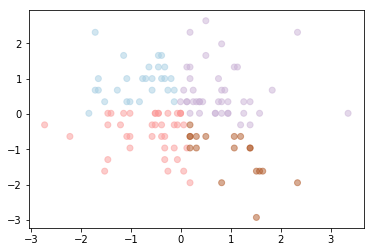

In [31]:
plt.scatter(X_test[:, 0].tolist(), X_test[:, 1].tolist(), c=Y_predict , cmap=plt.cm.Paired, alpha=0.5)

x_plot = np.arange(-3, 3)
y_plot = np.arange(-3, 3)

xy = [x_plot, y_plot]

H0_Theta['theta']
H1_Theta['theta']
H2_Theta['theta']
H3_Theta['theta']

## 5. Softmax Function

\begin{align}
\sigma(\mathbf{z})_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}
\end{align}

Một số vấn đề :
* Kết quả output có dạng [0.7, 0.8, 0.6]
* Kết quả trên không thể hiện được tính chất tổng các xác xuất phải bằng 1

Sử dụng Softmax có thể đưa ra kết luận hợp lý về tỉ lệ 1 biến X thuộc về 1 nhóm nào.

In [32]:
[softmax_stable(pr[0].tolist()[0]) for pr in Predict_resuild]

[array([0.24325974, 0.29860912, 0.213063  , 0.24506813]),
 array([0.17853631, 0.23435827, 0.23889237, 0.34821305]),
 array([0.26412219, 0.26931357, 0.23306614, 0.23349809]),
 array([0.21893335, 0.15774151, 0.40291312, 0.22041201]),
 array([0.26633281, 0.27130024, 0.23054797, 0.23181899]),
 array([0.23089897, 0.18107564, 0.37016439, 0.217861  ]),
 array([0.29973373, 0.16309626, 0.36670663, 0.17046338]),
 array([0.27991407, 0.31121903, 0.19711979, 0.21174711]),
 array([0.25550693, 0.22175988, 0.29565147, 0.22708172]),
 array([0.32040545, 0.22018935, 0.26501816, 0.19438703]),
 array([0.18649173, 0.27632593, 0.20449916, 0.33268318]),
 array([0.21724547, 0.20954976, 0.3202585 , 0.25294626]),
 array([0.25376423, 0.28421904, 0.22219194, 0.23982478]),
 array([0.17965677, 0.23712186, 0.23653223, 0.34668914]),
 array([0.30053666, 0.27306236, 0.21603514, 0.21036585]),
 array([0.19413249, 0.30529569, 0.19573776, 0.30483406]),
 array([0.2027834 , 0.30312484, 0.20209989, 0.29199187]),
 array([0.2250

## 9_Advance Topic

How is logistic regression used? What conditions and types of variables should be used?


Answer :
ADVANTAGES

I can see two main advantages of logistic regression over Chi2 or Fischer's exact test. The first is you can include more than one explanatory variable (dependent variable) and those can either be dichotomous, ordinal, or continuous. The second is that logistic regression provides a quantified value for the strength of the association adjusting for other variables (removes confounding effects). The exponential of coefficients correspond to odd ratios for the given factor.
DISADVANTAGE

1) You need enough participants with each possible set of explanatory variable. Using interaction or adding factors that a rare therefore reduce considerably the power of the analysis. This has to be carefully considered at the planning phase to make sure the sample size is large enough.
2) If you are using a dependent variable that is not binomial, you need to test the assumption of linearity before including it in the model. This is possible by first creating dummy variables for each value of an ordinal variable or by cutting down a continuous variable in different categories, and then using them as dummy variables. Likelihood ratio test can then be used to test if the model assuming linearity is similar to the one not assuming it. This has the major advantage of increasing the power of your analysis. It can require some transformation.
3) Logistic regression combines both binomial and normal distribution. This can sometimes cause problems. Quadrature check can be used to verify that these problems did not occur. Relative differences must be bellow 0.01 (1%) for all parameters.
4) Defining variables to enter in the model, adding, or removing explanatory variables can be complicated and must be carefully planned. Avoid important collinearity between variables as this will cause over-adjustement. Identify potential candidates using univariate analysis with a p-value threshold above the one you wish to use at the end as negative confounding can occur. When necessary consider introducing interaction terms if you are to believe some factors might increase the effects of others on your outcome.

Link : https://www.researchgate.net/post/How_is_logistic_regression_used_What_conditions_and_types_of_variables_should_be_used